In [1]:
import numpy as np
import pandas as pd

In [2]:
df_yield = pd.read_csv('/content/yield.csv')
df_yield.shape

(56717, 12)

In [3]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
df_yield = df_yield[df_yield['Area'] == "United States of America"]

In [5]:
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
53269,QC,Crops,231,United States of America,5419,Yield,56,Maize,1961,1961,hg/ha,39184
53270,QC,Crops,231,United States of America,5419,Yield,56,Maize,1962,1962,hg/ha,40621
53271,QC,Crops,231,United States of America,5419,Yield,56,Maize,1963,1963,hg/ha,42596
53272,QC,Crops,231,United States of America,5419,Yield,56,Maize,1964,1964,hg/ha,39498
53273,QC,Crops,231,United States of America,5419,Yield,56,Maize,1965,1965,hg/ha,46492


In [6]:
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
53269,United States of America,Maize,1961,39184
53270,United States of America,Maize,1962,40621
53271,United States of America,Maize,1963,42596
53272,United States of America,Maize,1964,39498
53273,United States of America,Maize,1965,46492


In [7]:
df_yield.describe()

,Year,hg/ha_yield
count,392.000000,392.000000
mean,1988.500000,102928.051020
std,16.183886,113490.048203
min,1961.000000,15309.000000
25%,1974.750000,28925.000000
50%,1988.500000,51655.500000
75%,2002.250000,122718.750000
max,2016.000000,490203.000000


In [8]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 53269 to 53660
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         392 non-null    object
 1   Item         392 non-null    object
 2   Year         392 non-null    int64 
 3   hg/ha_yield  392 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.3+ KB


In [13]:
df_rain = pd.read_csv('/content/rainfall.csv')
df_rain = df_rain[df_rain[' Area'] == "United States"]
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
6386,United States,1985,715
6387,United States,1986,715
6388,United States,1987,715
6389,United States,1989,715
6390,United States,1990,715


In [14]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [23]:
df_rain['Area'] = df_rain['Area'].replace('United States', 'United States of America')

In [15]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 6386 to 6416
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           31 non-null     object
 1   Year                           31 non-null     int64 
 2   average_rain_fall_mm_per_year  31 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [16]:
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 6386 to 6416
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           31 non-null     object
 1   Year                           31 non-null     int64 
 2   average_rain_fall_mm_per_year  31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [17]:
df_rain = df_rain.dropna()

In [18]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,31.000000,31.0
mean,2001.354839,715.0
std,9.686927,0.0
min,1985.000000,715.0
25%,1993.500000,715.0
50%,2001.000000,715.0
75%,2009.500000,715.0
max,2017.000000,715.0


In [24]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [25]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,United States of America,Maize,1985,74074,715
1,United States of America,Potatoes,1985,333689,715
2,United States of America,"Rice, paddy",1985,60704,715
3,United States of America,Sorghum,1985,41899,715
4,United States of America,Soybeans,1985,22923,715


In [26]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,210.000000,210.000000,210.0
mean,2000.833333,121195.747619,715.0
std,9.263595,129809.473092,0.0
min,1985.000000,21783.000000,715.0
25%,1993.000000,30414.000000,715.0
50%,2000.500000,68382.000000,715.0
75%,2009.000000,162509.000000,715.0
max,2016.000000,490203.000000,715.0


In [33]:
avg_temp = pd.read_csv('/content/temp.csv')

In [35]:
avg_temp = avg_temp[avg_temp['country'] == "United States"]
avg_temp['country'] = avg_temp['country'].replace('United States', 'United States of America')

<ipython-input-35-9a485be93e42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_temp['country'] = avg_temp['country'].replace('United States', 'United States of America')


In [36]:
avg_temp.head()

,year,country,avg_temp
1491,1820,United States of America,9.86
1492,1821,United States of America,12.36
1493,1822,United States of America,18.03
1494,1823,United States of America,20.36
1495,1824,United States of America,21.65


In [37]:
avg_temp.describe()

,year,avg_temp
count,11973.000000,11592.000000
mean,1894.258832,14.043856
std,72.811837,4.231166
min,1743.000000,-8.460000
25%,1839.000000,11.000000
50%,1898.000000,14.300000
75%,1956.000000,16.550000
max,2013.000000,28.010000


In [38]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
1491,1820,United States of America,9.86
1492,1821,United States of America,12.36
1493,1822,United States of America,18.03
1494,1823,United States of America,20.36
1495,1824,United States of America,21.65


In [39]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,avg_temp
0,United States of America,Maize,1985,74074,715,11.28
1,United States of America,Maize,1985,74074,715,12.79
2,United States of America,Maize,1985,74074,715,15.50
3,United States of America,Maize,1985,74074,715,14.86
4,United States of America,Maize,1985,74074,715,20.07


In [40]:
yield_df.shape

(9828, 6)

In [41]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,avg_temp
count,9828.000000,9828.000000,9828.0,9828.000000
mean,1999.259259,118660.111111,715.0,15.143497
std,8.369649,126742.947379,0.0,3.998788
min,1985.000000,21783.000000,715.0,4.010000
25%,1992.000000,29595.000000,715.0,12.280000
50%,1999.000000,66851.000000,715.0,15.275000
75%,2007.000000,161270.000000,715.0,17.482500
max,2013.000000,464446.000000,715.0,24.440000


In [42]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
avg_temp                         0
dtype: int64

In [43]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,avg_temp
Item,,,,,
Maize,1404,1404,1404,1404,1404
Potatoes,1404,1404,1404,1404,1404
"Rice, paddy",1404,1404,1404,1404,1404
Sorghum,1404,1404,1404,1404,1404
Soybeans,1404,1404,1404,1404,1404
Sweet potatoes,1404,1404,1404,1404,1404
Wheat,1404,1404,1404,1404,1404


In [44]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,avg_temp
count,9828.000000,9828.000000,9828.0,9828.000000
mean,1999.259259,118660.111111,715.0,15.143497
std,8.369649,126742.947379,0.0,3.998788
min,1985.000000,21783.000000,715.0,4.010000
25%,1992.000000,29595.000000,715.0,12.280000
50%,1999.000000,66851.000000,715.0,15.275000
75%,2007.000000,161270.000000,715.0,17.482500
max,2013.000000,464446.000000,715.0,24.440000


In [45]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

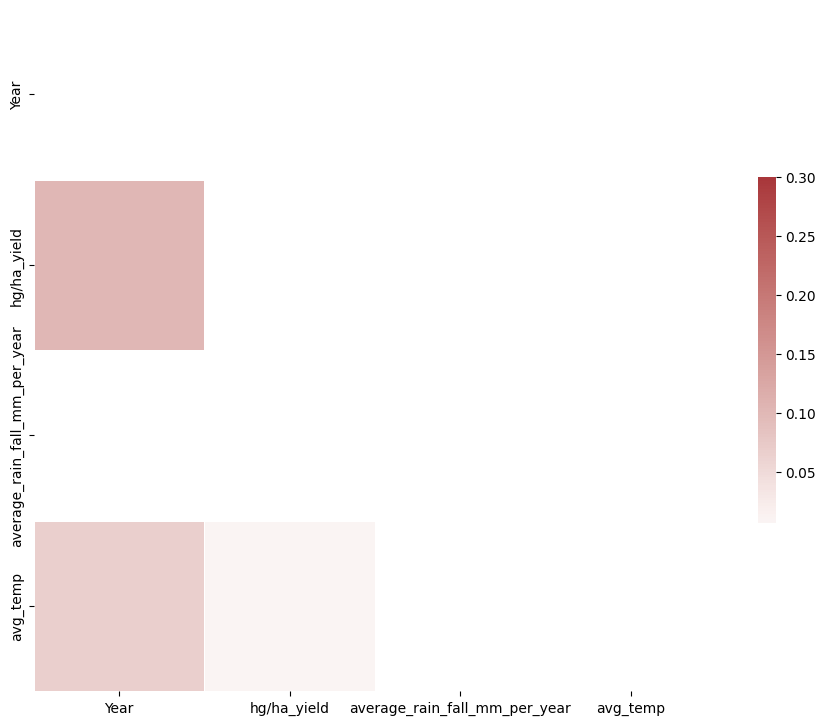

In [47]:
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.palette="vlag"

sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,avg_temp,Country_United States of America,Item_Maize,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat
0,1985,715,11.28,1,1,0,0,0,0,0,0
1,1985,715,12.79,1,1,0,0,0,0,0,0
2,1985,715,15.50,1,1,0,0,0,0,0,0
3,1985,715,14.86,1,1,0,0,0,0,0,0
4,1985,715,20.07,1,1,0,0,0,0,0,0


In [50]:
features = features.drop(['Year'], axis=1)

In [51]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 0 to 9827
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   average_rain_fall_mm_per_year     9828 non-null   int64  
 1   avg_temp                          9828 non-null   float64
 2   Country_United States of America  9828 non-null   uint8  
 3   Item_Maize                        9828 non-null   uint8  
 4   Item_Potatoes                     9828 non-null   uint8  
 5   Item_Rice, paddy                  9828 non-null   uint8  
 6   Item_Sorghum                      9828 non-null   uint8  
 7   Item_Soybeans                     9828 non-null   uint8  
 8   Item_Sweet potatoes               9828 non-null   uint8  
 9   Item_Wheat                        9828 non-null   uint8  
dtypes: float64(1), int64(1), uint8(8)
memory usage: 307.1 KB


In [52]:
features.head()

,average_rain_fall_mm_per_year,avg_temp,Country_United States of America,Item_Maize,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat
0,715,11.28,1,1,0,0,0,0,0,0
1,715,12.79,1,1,0,0,0,0,0,0
2,715,15.50,1,1,0,0,0,0,0,0
3,715,14.86,1,1,0,0,0,0,0,0
4,715,20.07,1,1,0,0,0,0,0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [54]:
features

array([[0.        , 0.35584924, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.42976016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.56240822, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.65002447, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.49828683, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.55408713, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [55]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [56]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [57]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [59]:
model_train=list(map(compare_models,models))

In [60]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.9719802986387391]
['RandomForestRegressor', 0.958289405482114]
['SVR', -0.15900323539029482]
['DecisionTreeRegressor', 0.9580538222435246]


In [61]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [62]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,avg_temp,Country_United States of America,Item_Maize,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat
0,74074,715,11.28,1,1,0,0,0,0,0,0
1,74074,715,12.79,1,1,0,0,0,0,0,0
2,74074,715,15.50,1,1,0,0,0,0,0,0
3,74074,715,14.86,1,1,0,0,0,0,0,0
4,74074,715,20.07,1,1,0,0,0,0,0,0


In [63]:
test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns)

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [64]:
test_df.head()

,average_rain_fall_mm_per_year,avg_temp,Country_United States of America,Item_Maize,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat
0,0.0,0.667646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.889378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.616740,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.711698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.782183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,avg_temp
0,0.0,0.667646
1,0.0,0.889378
2,0.0,0.616740
3,0.0,0.711698
4,0.0,0.782183


In [67]:
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,avg_temp,Item
0,0.0,0.667646,Soybeans
1,0.0,0.889378,Potatoes
2,0.0,0.616740,Sweet potatoes
3,0.0,0.711698,Wheat
4,0.0,0.782183,Wheat


In [68]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")

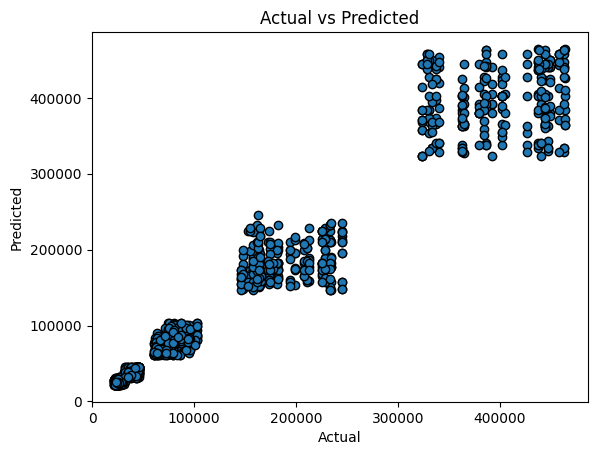

In [69]:
fig, ax = plt.subplots()

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [70]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

<ipython-input-71-fc39f57c7b3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);


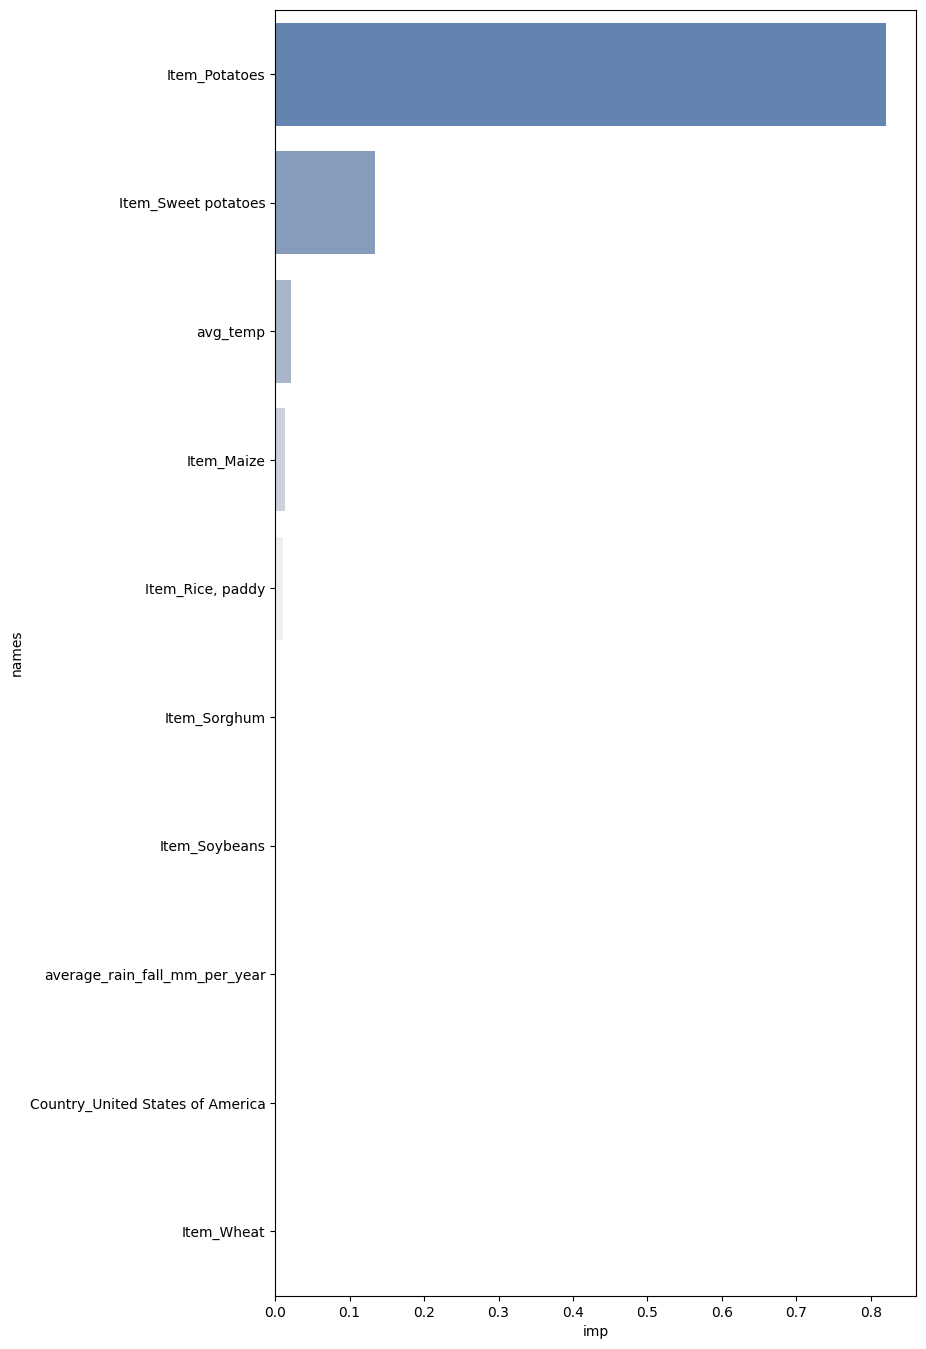

In [71]:
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

<ipython-input-72-51b4d1164a97>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);


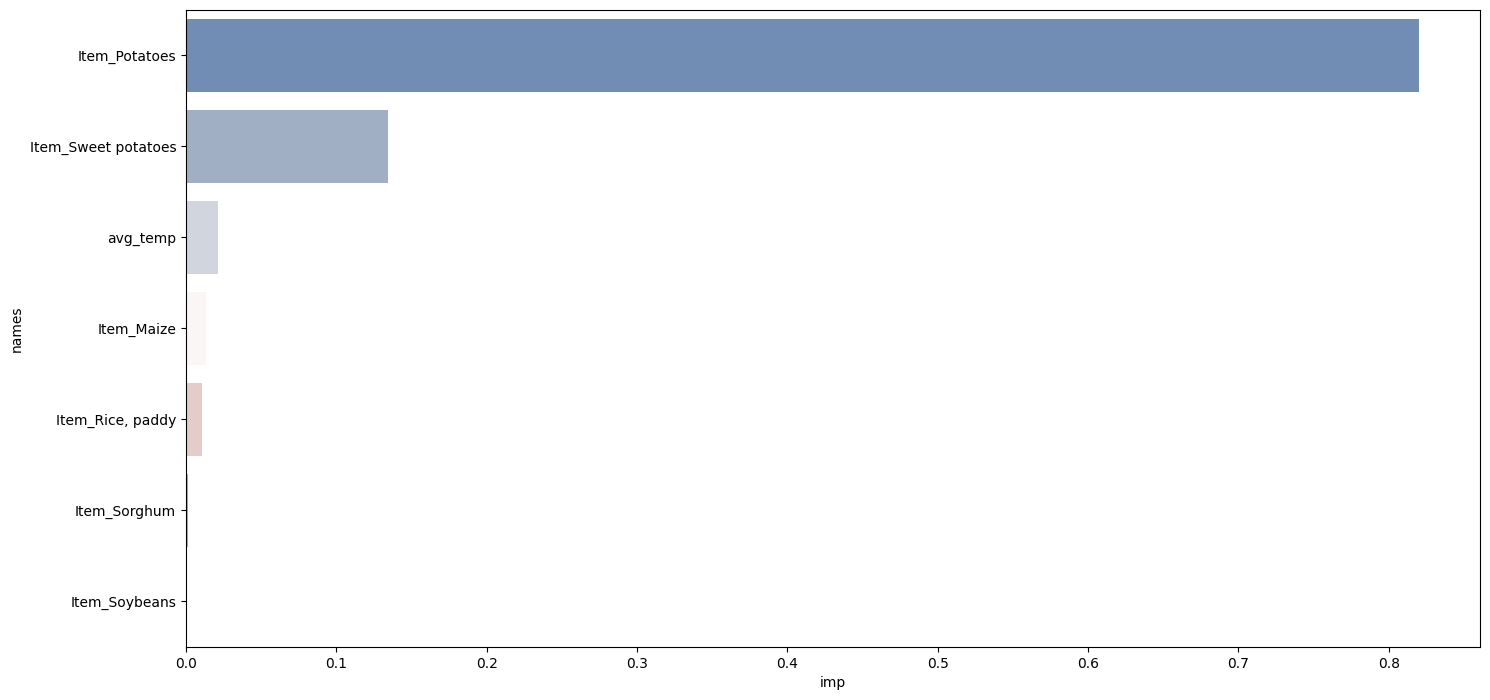

In [72]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

<ipython-input-73-9c08f4ac470b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);


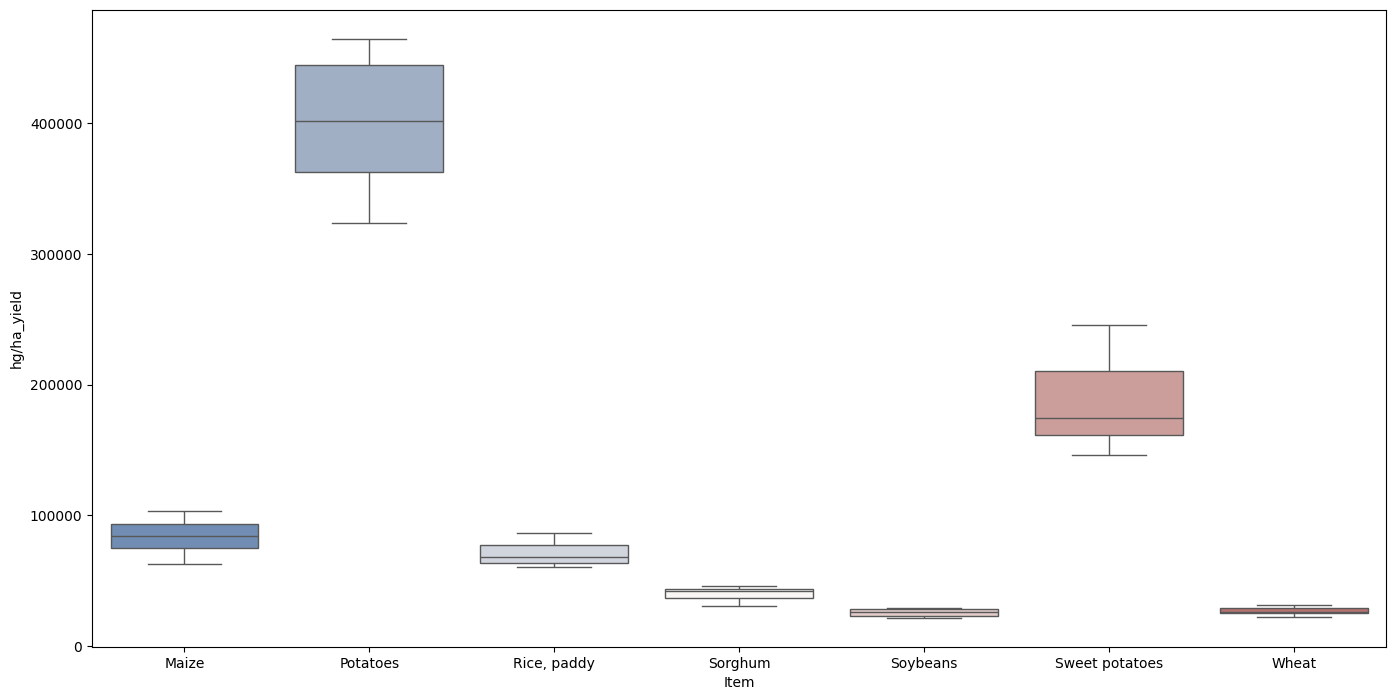

In [73]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);